## Settings

In [2]:
setwd("~/git/hist_future_hail/")                             # Working directory.
source("modules/gev_functions.R")                            # Load helper functions.
variables = c("hailcast_diam_max", "wind_10m")               # Variables to process.
results_dir = "/g/data/up6/tr2908/hist_future_hail/results/" # Results directory.
set.seed(42)                                                 # Random seed for reproducibility.

## Read in data

In [3]:
all_dat = read_feathers(results_dir = results_dir)

[1] "/g/data/up6/tr2908/hist_future_hail/results//Brisbane_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Brisbane_ssp245_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Melbourne_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Melbourne_ssp245_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Perth_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Perth_ssp245_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Sydney_Canberra_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Sydney_Canberra_ssp245_block_maxima.feather"


## Timeseries of maxima

First the timeseries of daily hail diameter maxima.

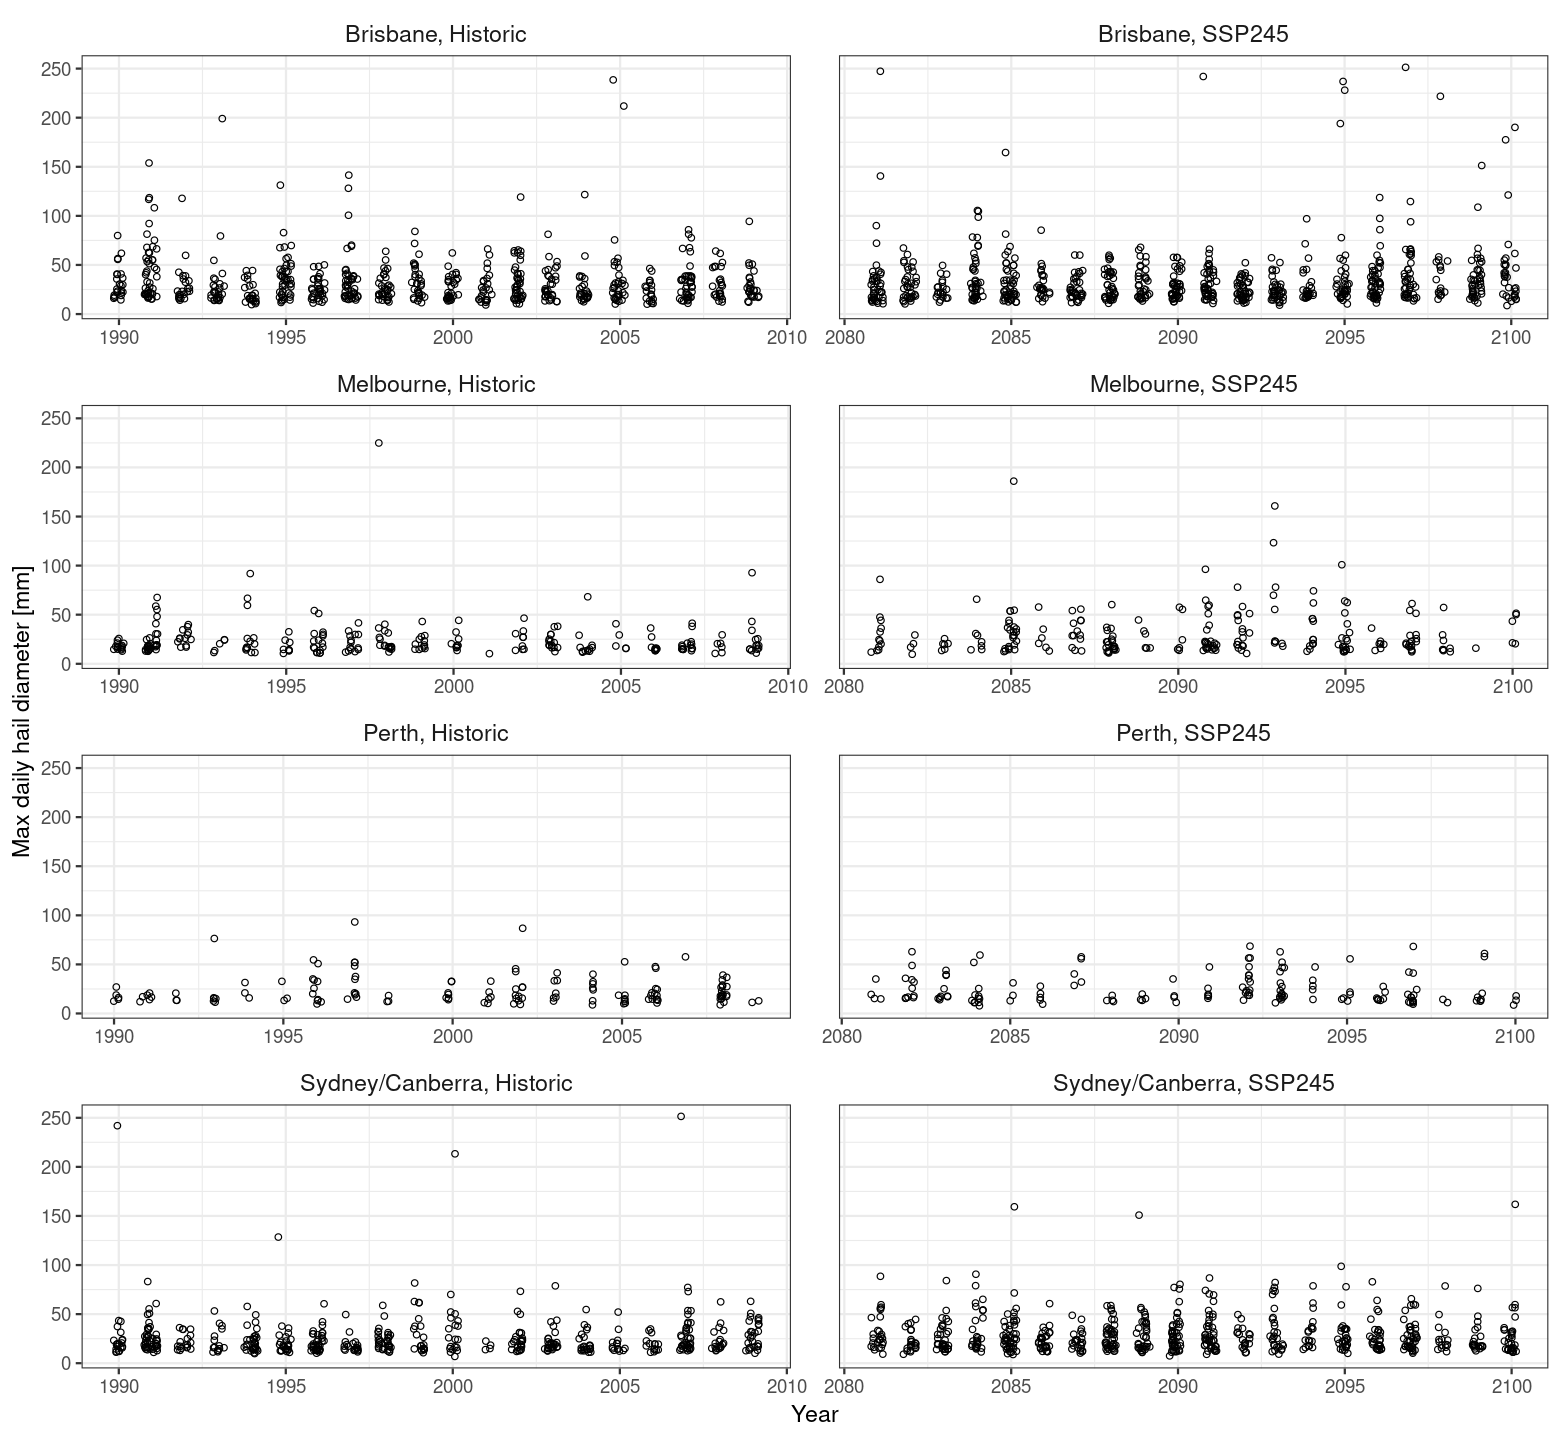

In [4]:
options(repr.plot.width = 13, repr.plot.height = 12)
plot_ts(
    dat = all_dat, ylabel = "Max daily hail diameter [mm]", var = "hailcast_diam_max",
    file = "paper/figures/timeseries_hail.pdf"
)

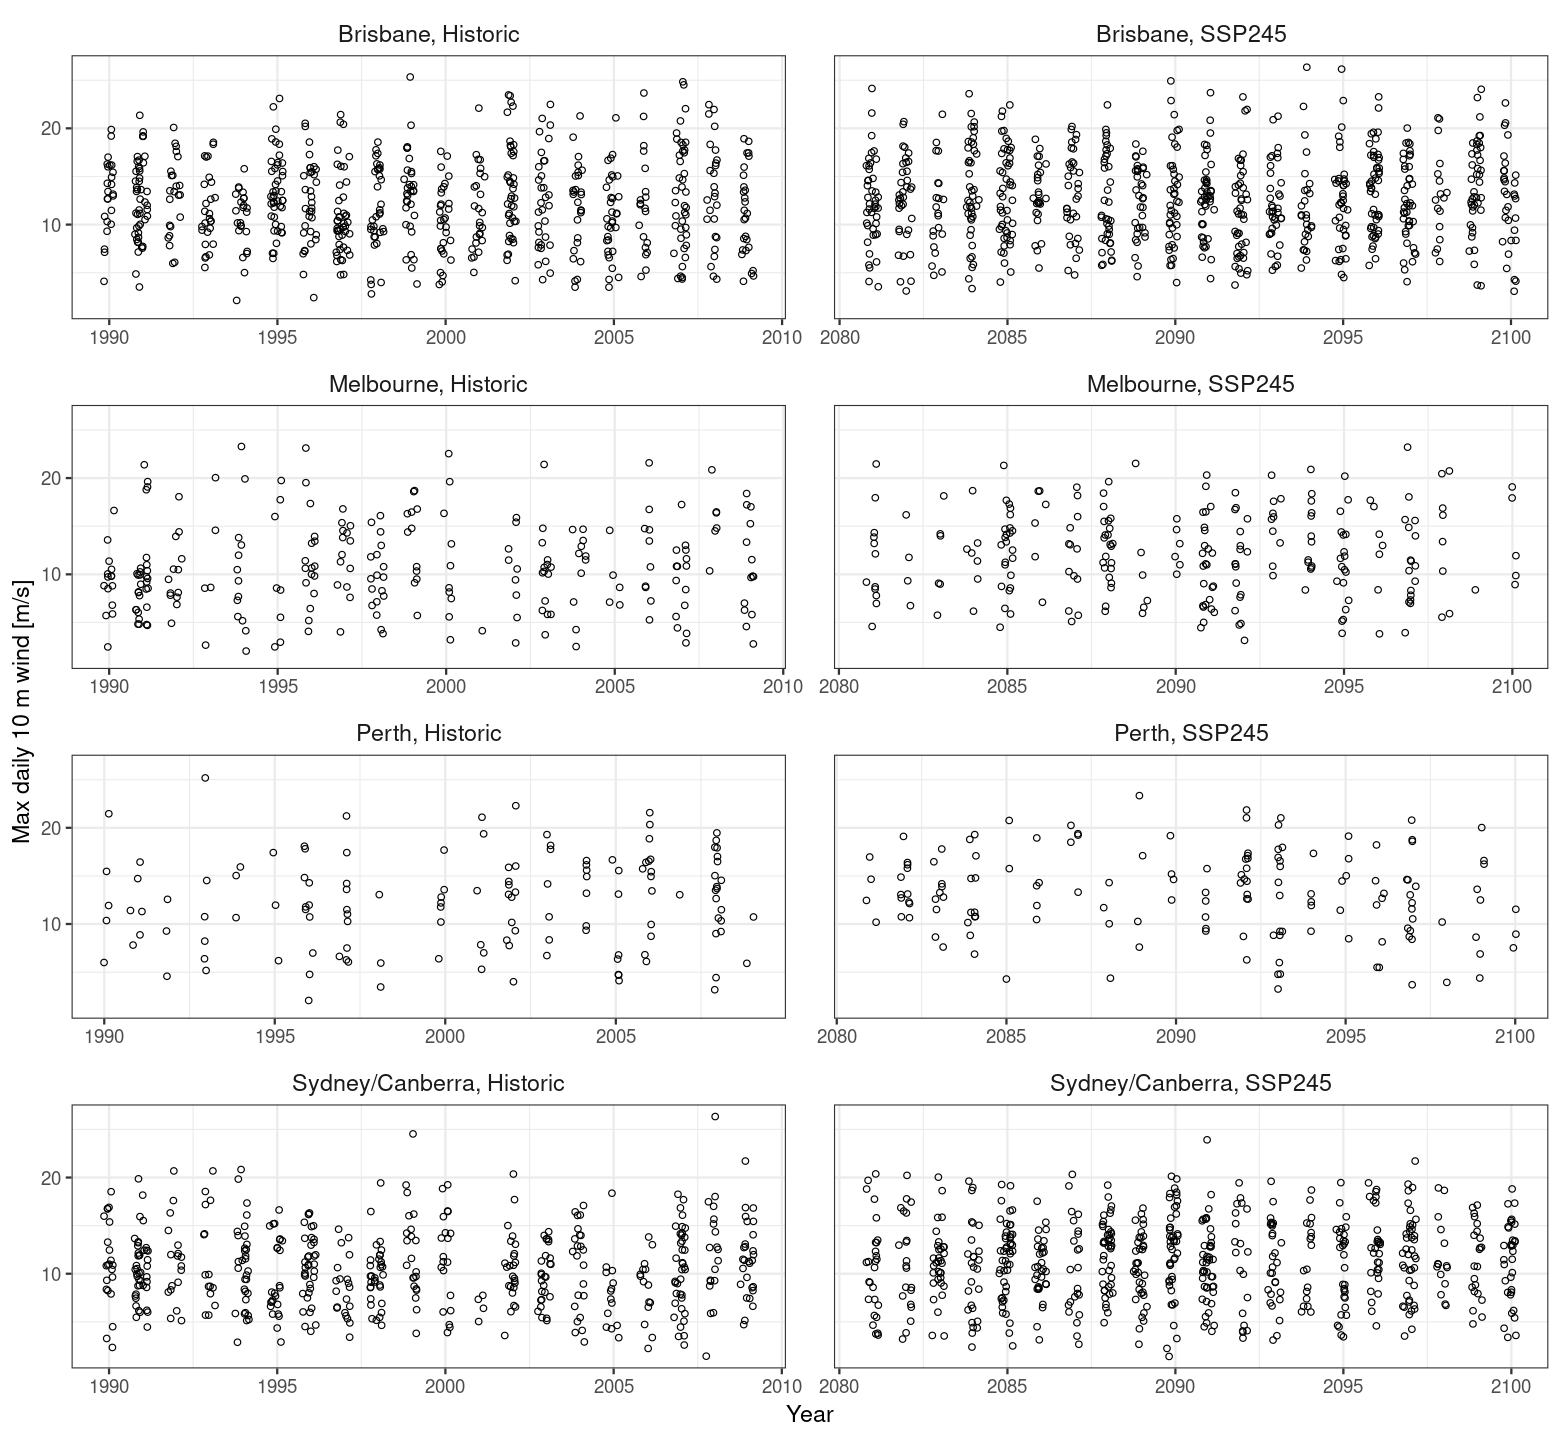

In [5]:
plot_ts(
    dat = all_dat, ylabel = "Max daily 10 m wind [m/s]", var = "wind_10m",
    file = "paper/figures/timeseries_wind.pdf"
)

## GEV fitting

In [6]:
gev_fits = fit_gevs(all_dat = all_dat)

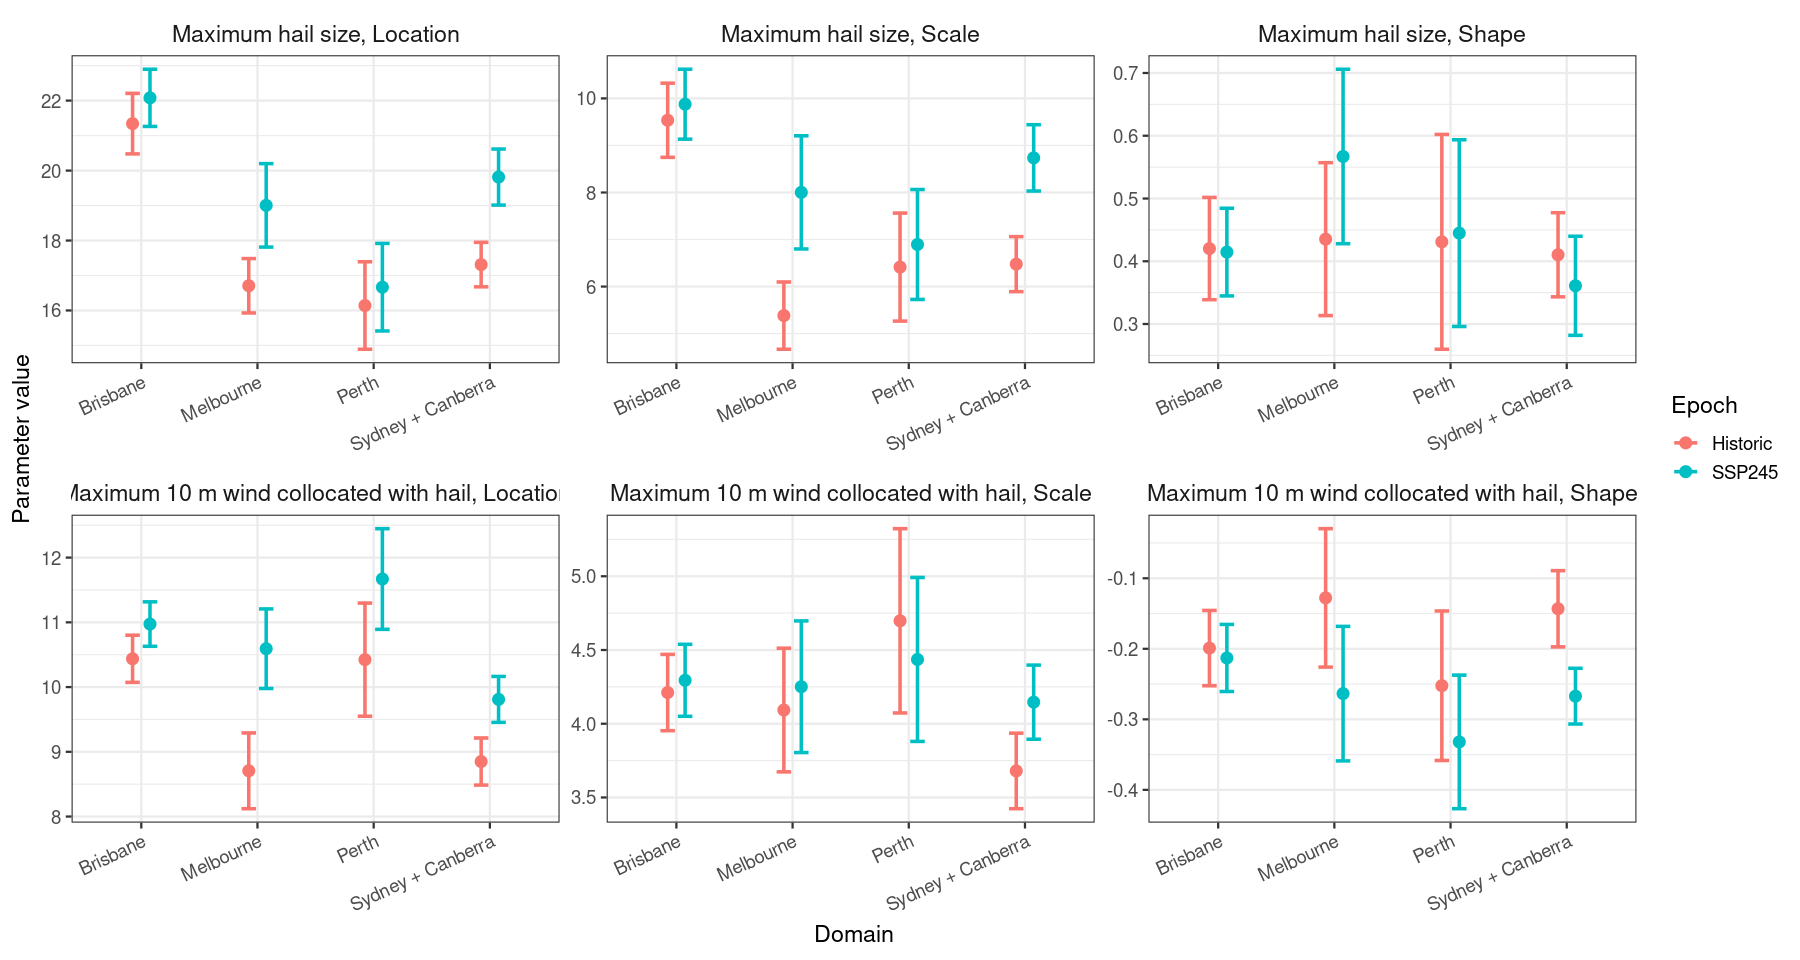

In [7]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_params(gev_fits = gev_fits, file = "paper/figures/fit_params.pdf")

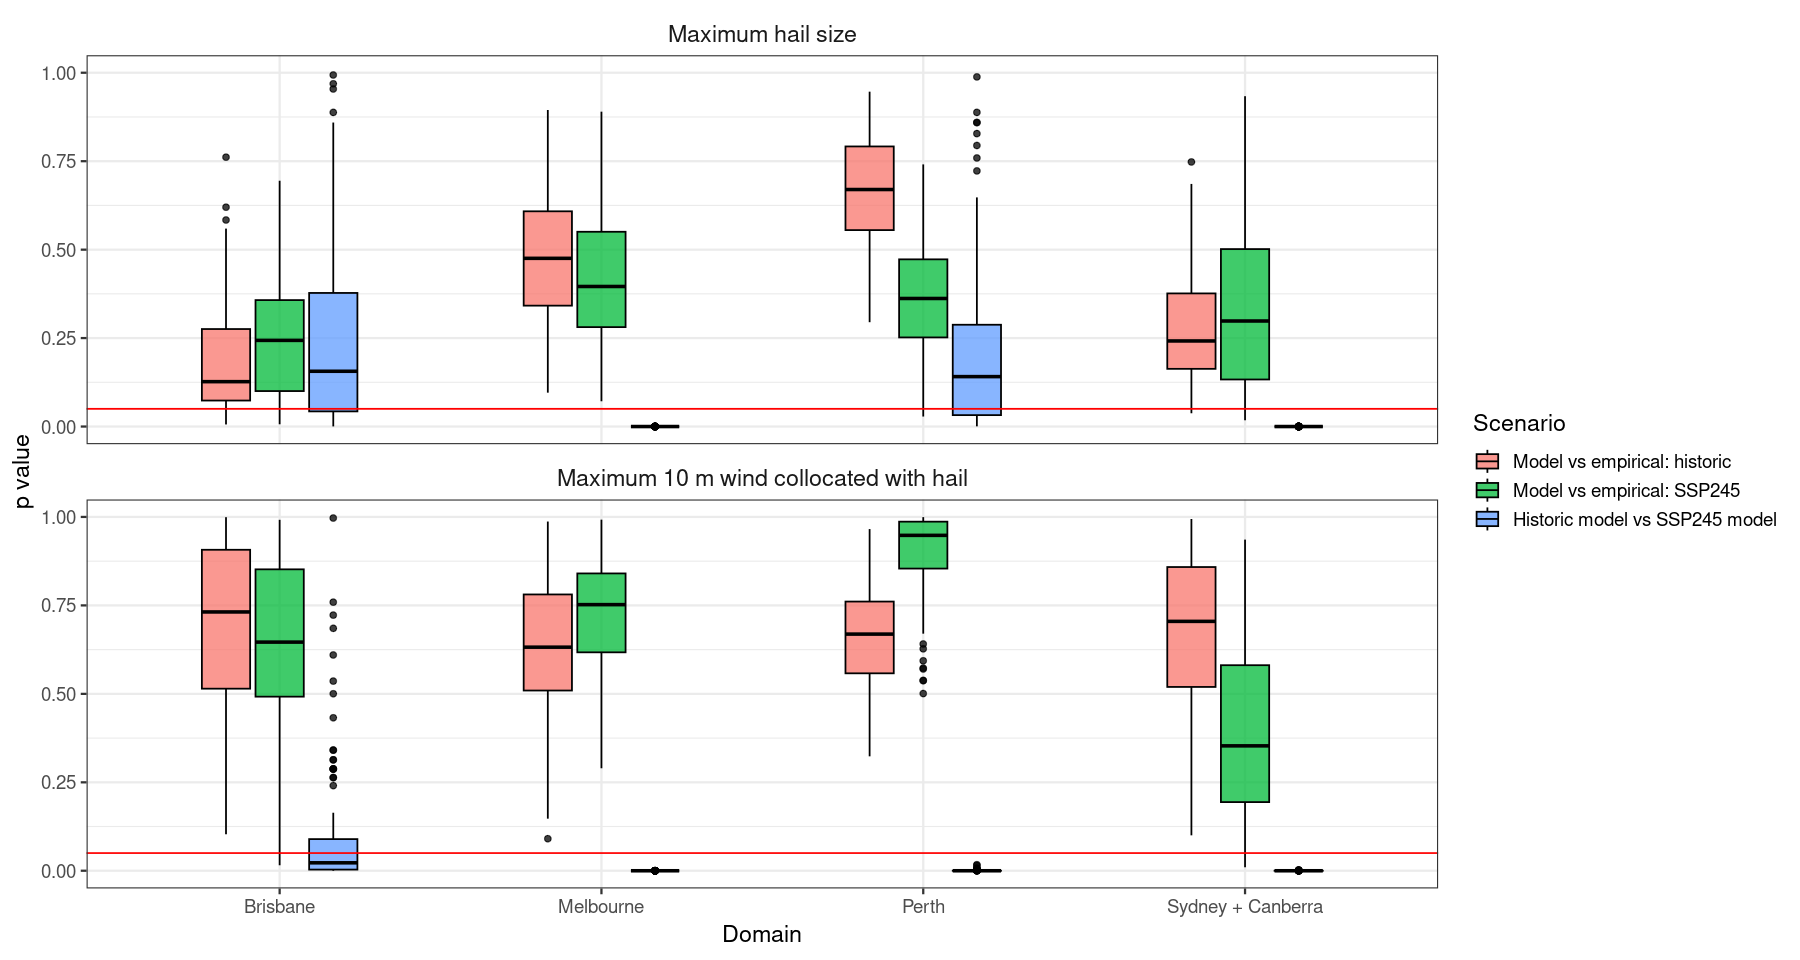

In [8]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_ks_fits(gev_fits = gev_fits, file = "paper/figures/fit_pvals.pdf")

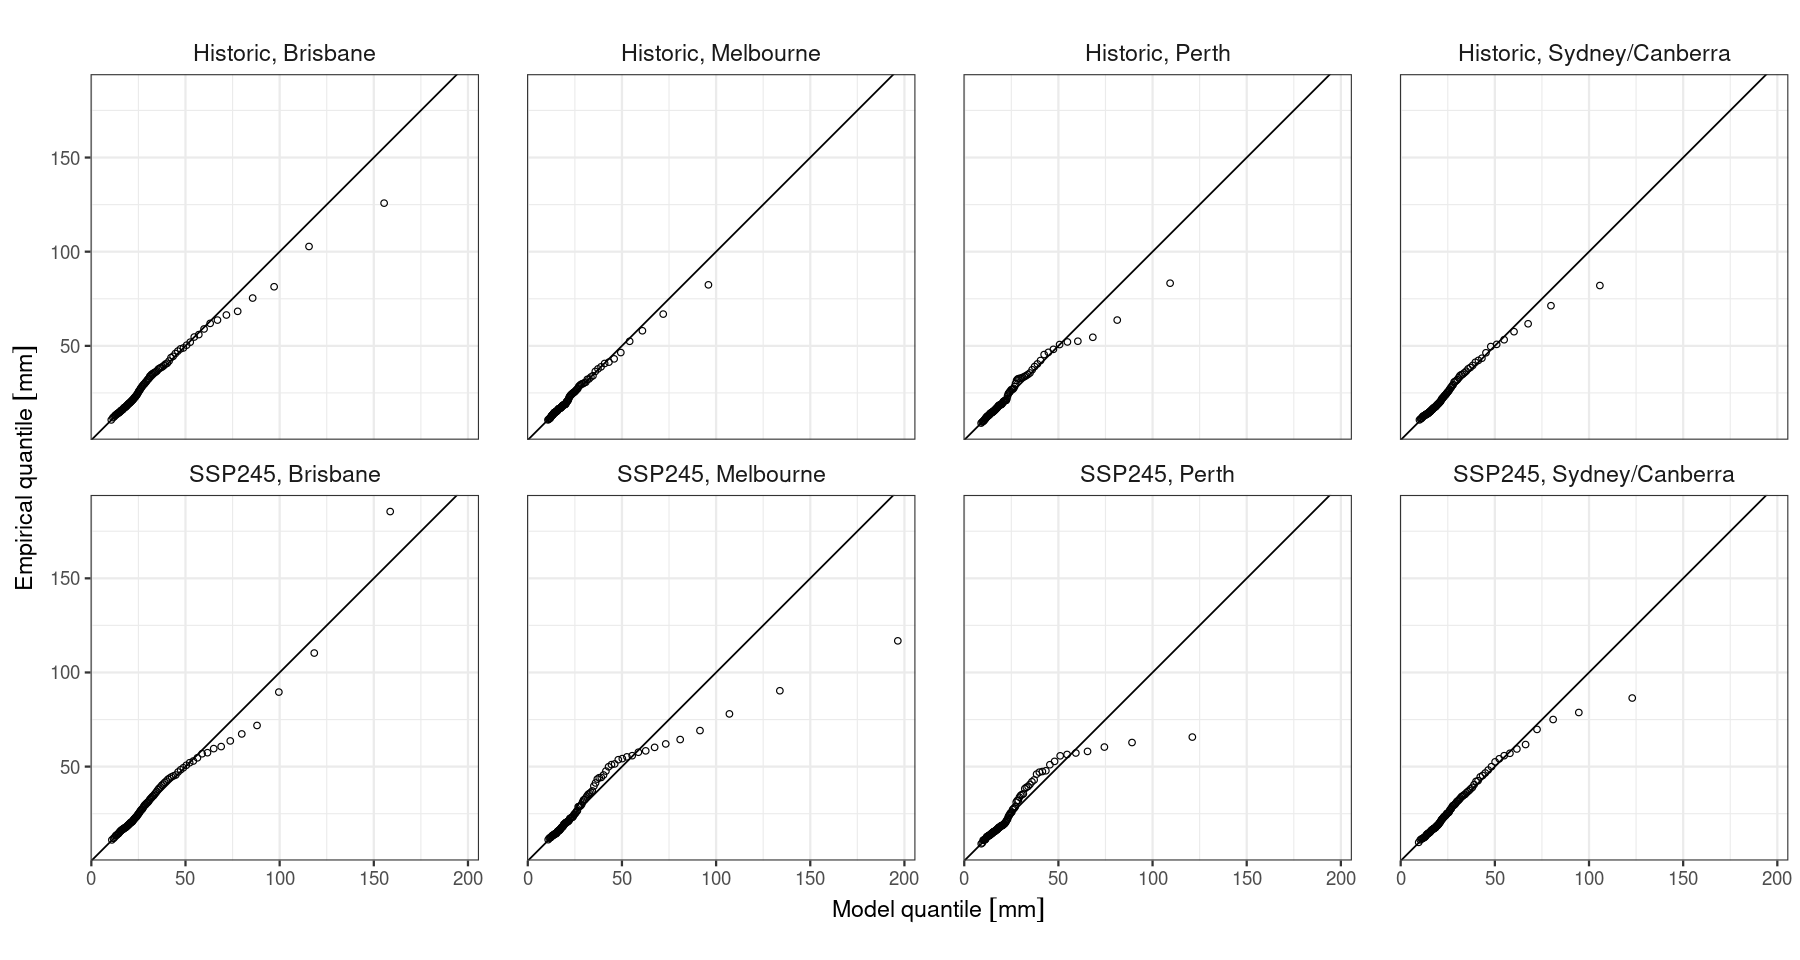

In [9]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_quantiles(gev_fits = gev_fits, var = "hailcast_diam_max", unit = "mm", file = "paper/figures/qq_hail.pdf")

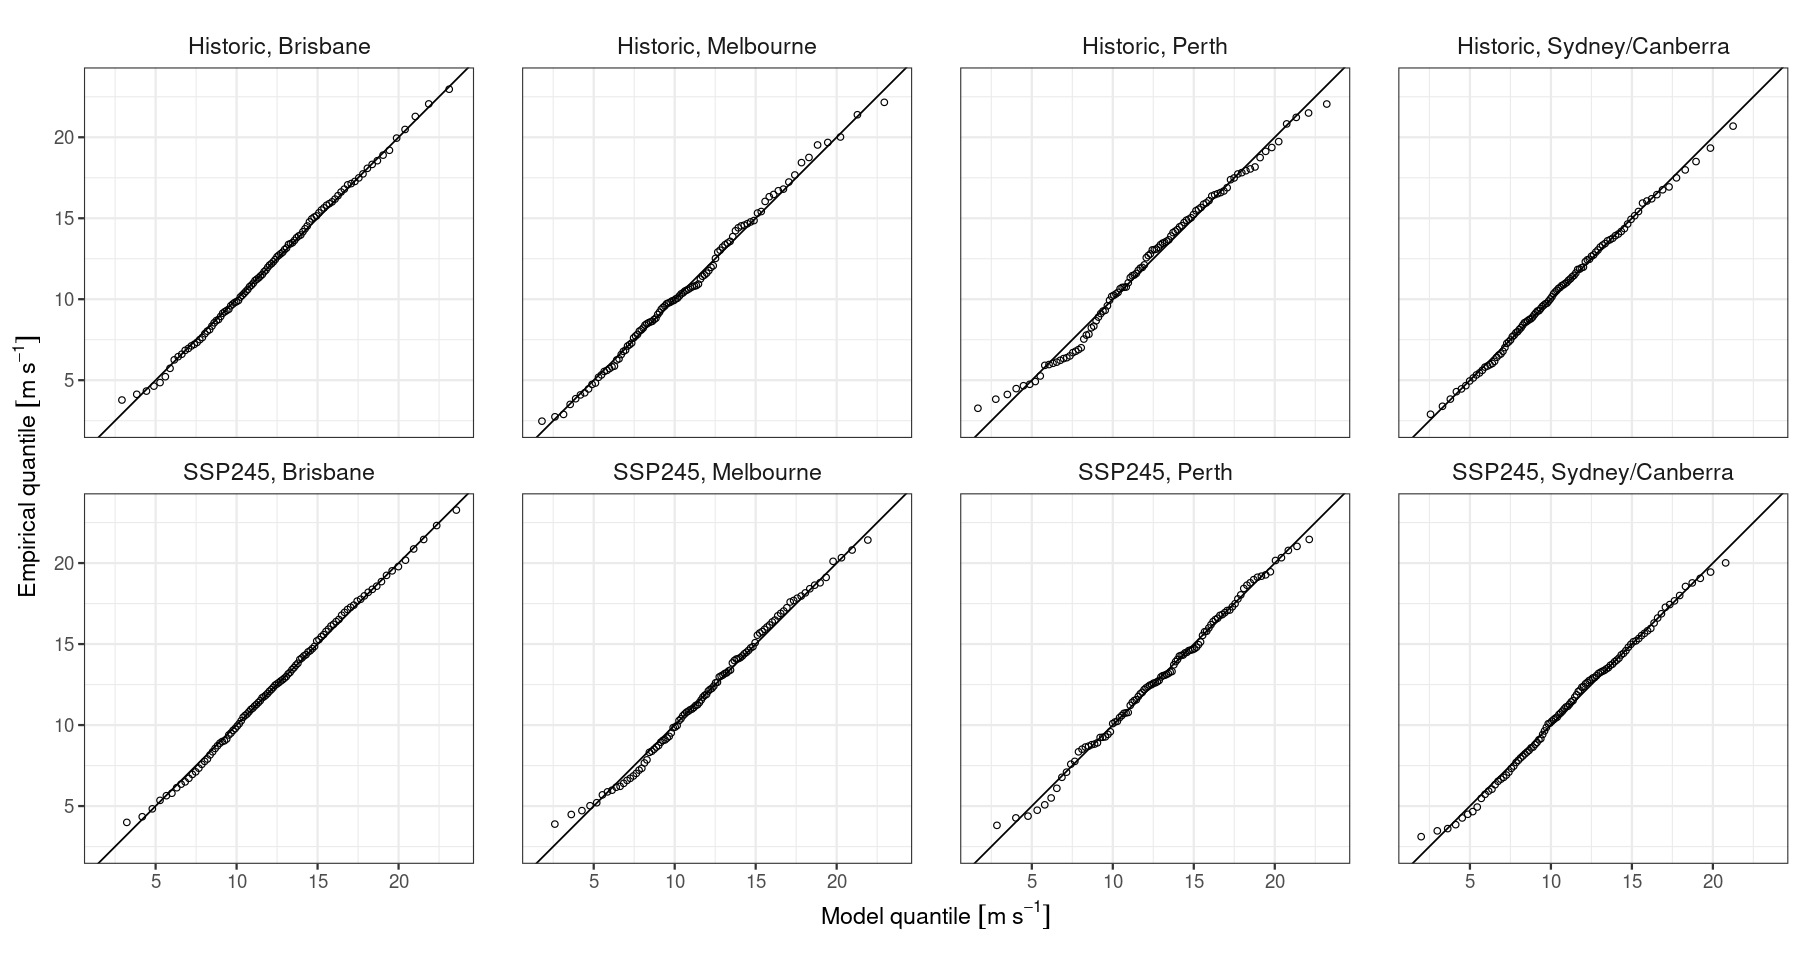

In [10]:
plot_quantiles(gev_fits = gev_fits, var = "wind_10m", unit = "m~s^{-1}", file = "paper/figures/qq_wind.pdf")

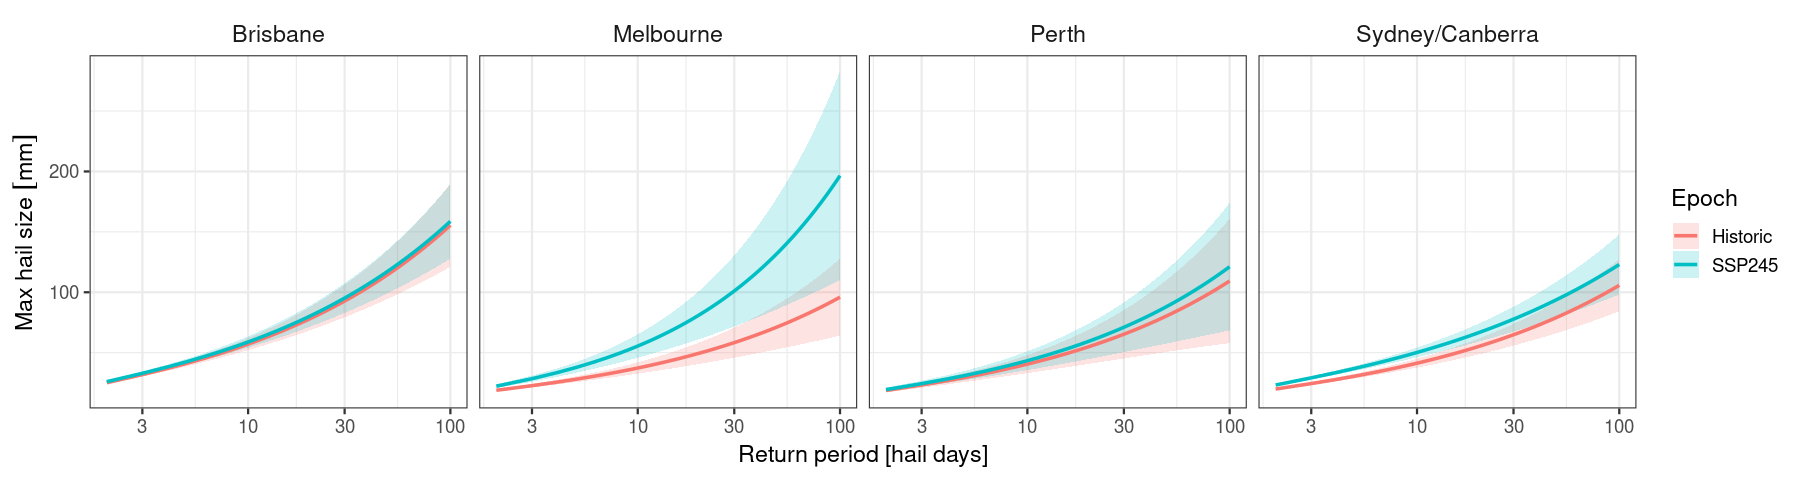

In [11]:
options(repr.plot.width = 15, repr.plot.height = 4)
plot_return_levels(
    gev_fits = gev_fits, var = "hailcast_diam_max",
    varname = "Max~hail~size~group('[',mm,']')", file = "paper/figures/return_periods_hail.pdf"
)

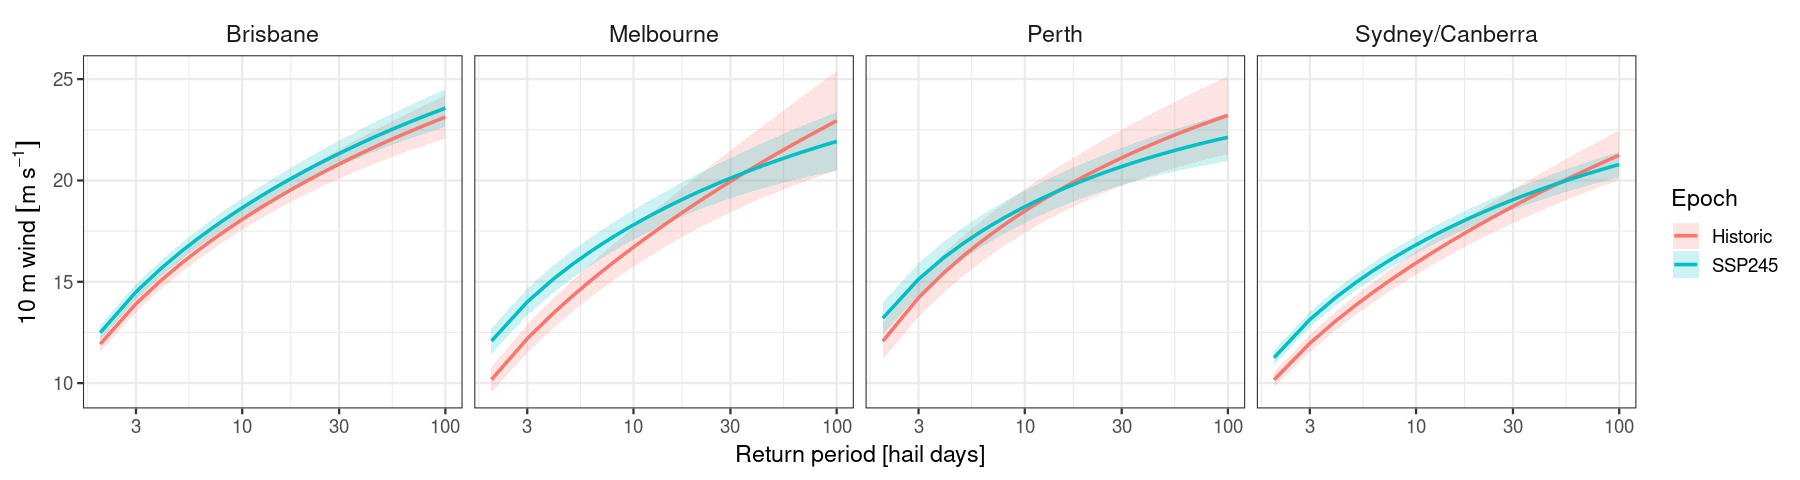

In [12]:
options(repr.plot.width = 15, repr.plot.height = 4)
plot_return_levels(
    gev_fits = gev_fits, var = "wind_10m",
    varname = "10~m~wind~group('[',m~s^{-1},']')", file = "paper/figures/return_periods_wind.pdf"
)

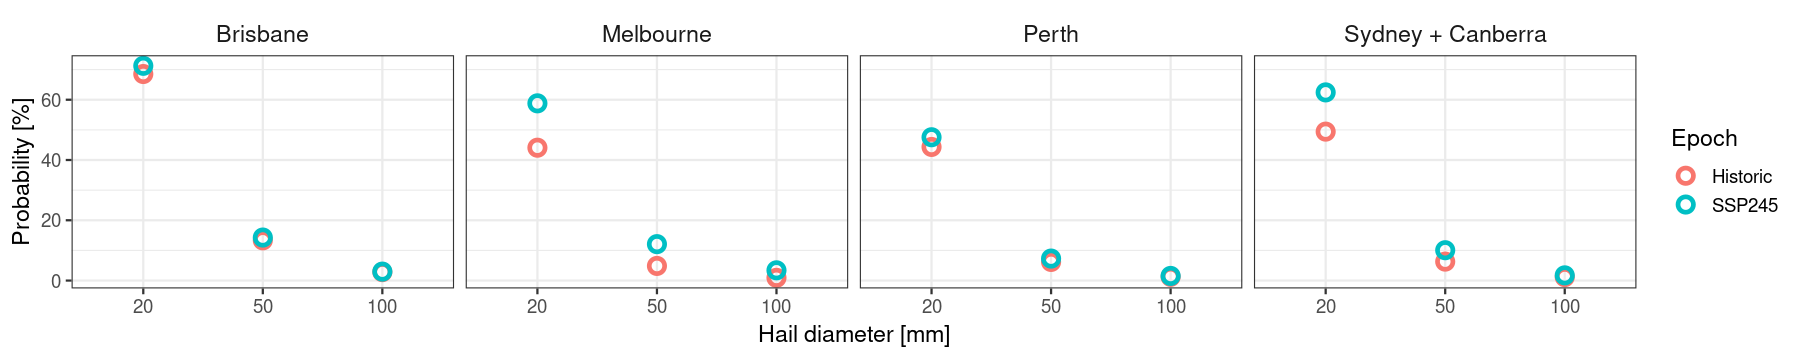

In [13]:
options(repr.plot.width = 15, repr.plot.height = 3)
plot_hail_probs(gev_fits = gev_fits, file = "paper/figures/hail_probs.pdf")

In [14]:
write_feather(gev_fits$hail_probs, "results/hail_probs.feather")

In [16]:
library(tables)
probs <- gev_fits$hail_probs
probs$domain = factor(probs$domain)
probs$epoch <- factor(probs$epoch, levels = c("historic", "ssp245"), labels = c("Historic", "SSP245"))
probs$diam <- factor(probs$diam, levels = c(20, 50, 100), labels = c("20 mm", "50 mm", "100 mm"))
tab <- tabular(
    Heading("Domain") * domain *
        Heading("Epoch") * epoch ~ Heading("Probability [\\%] by hail diameter") * diam *
        Heading() * p * Heading() * identity * Format(digits = 1),
    data = probs,
)
t <- latexTable(tab,
    caption = paste(
        "Probability of a hail day producing surface hail of various diameters, ",
        "by domain and epoch."
    ),
    label = "hail_probs"
)
# cat(t, file = "paper/tables/hail_probs.tex") # nolint
tab

                                                                           
                            Probability [\\%] by hail diameter             
 Domain            Epoch    20 mm                              50 mm 100 mm
 Brisbane          Historic 68.5                               13.3   2.8  
                   SSP245   71.2                               14.3   3.0  
 Melbourne         Historic 44.1                                4.9   0.9  
                   SSP245   58.8                               12.1   3.4  
 Perth             Historic 44.3                                6.2   1.2  
                   SSP245   47.5                                7.3   1.5  
 Sydney + Canberra Historic 49.4                                6.3   1.1  
                   SSP245   62.4                               10.1   1.7  